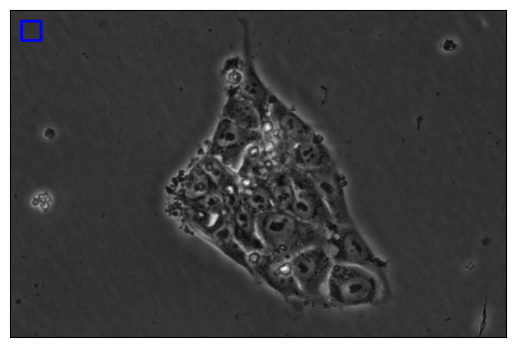

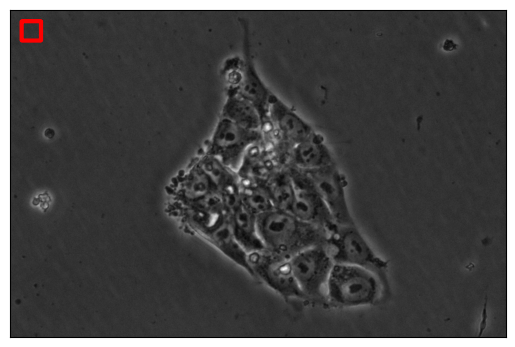

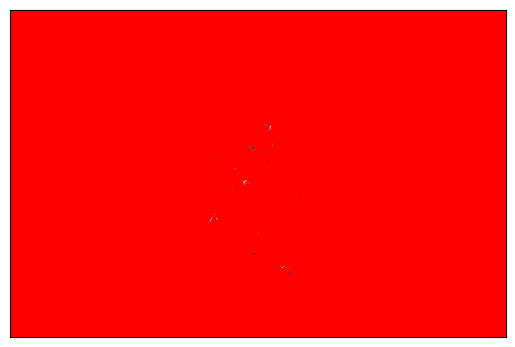

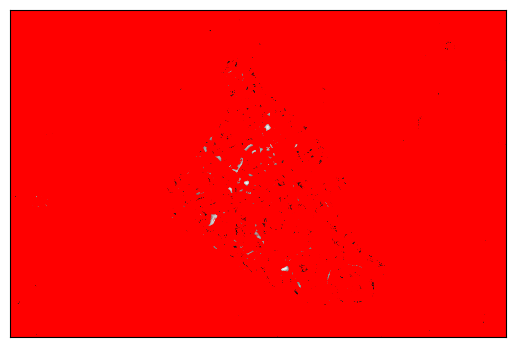

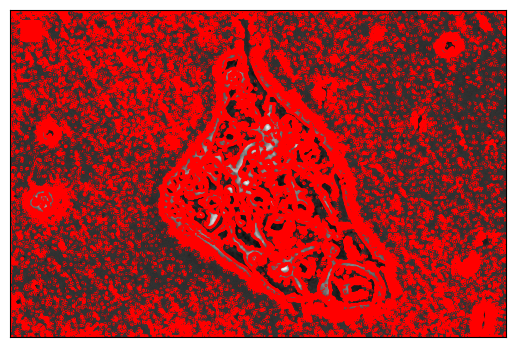

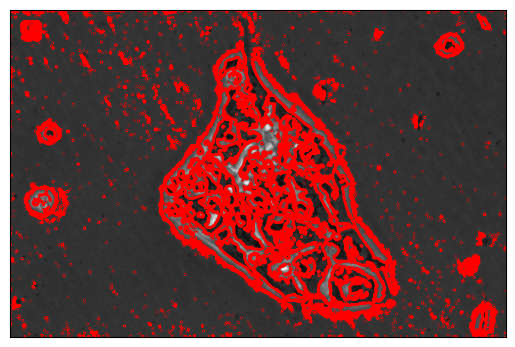

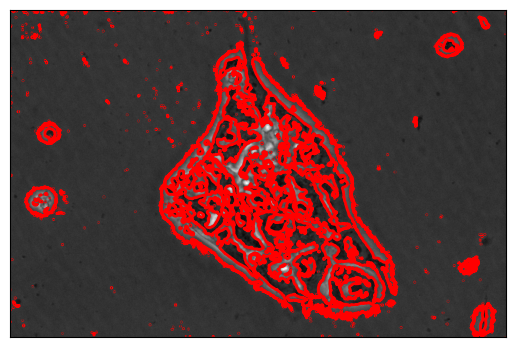

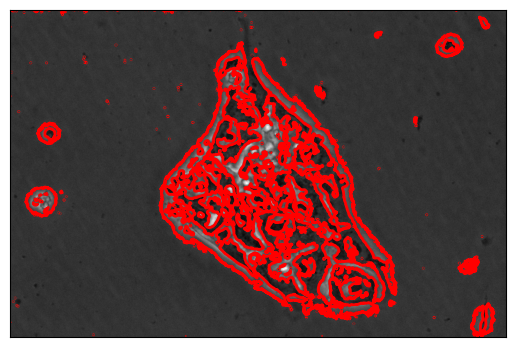

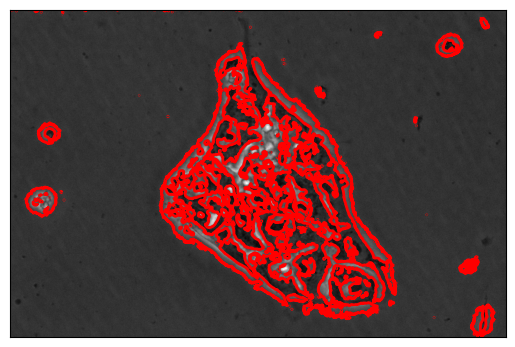

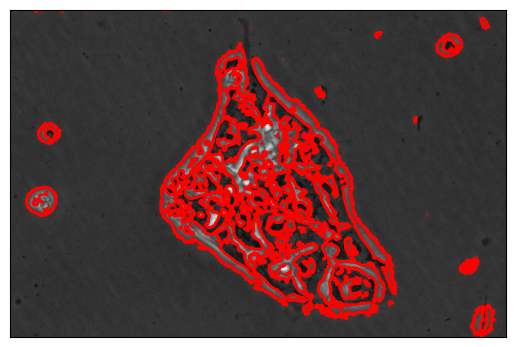

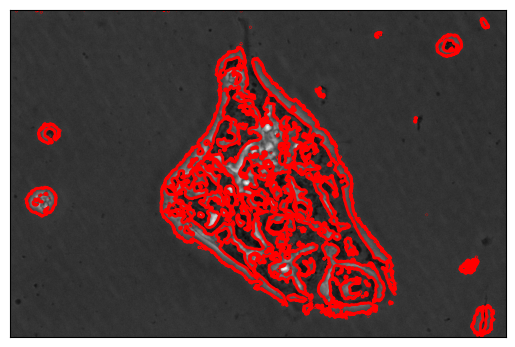

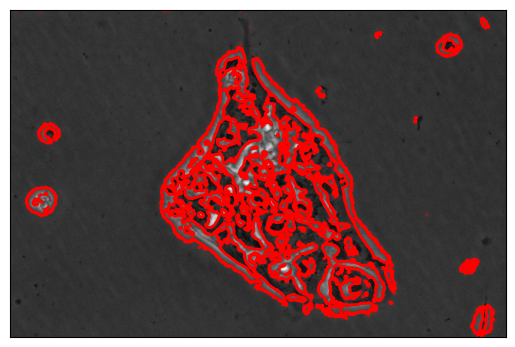

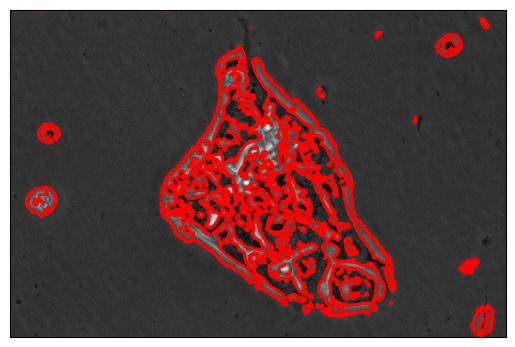

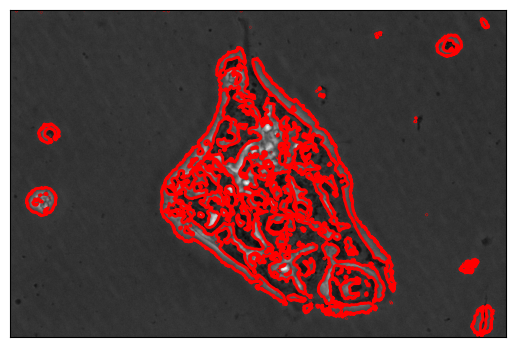

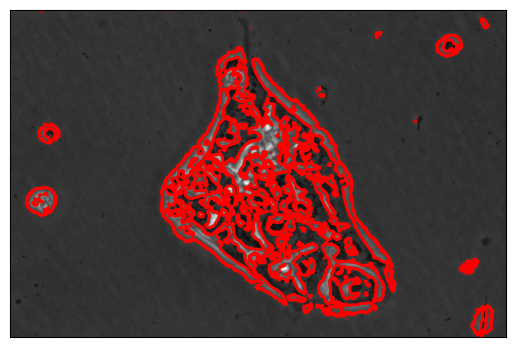

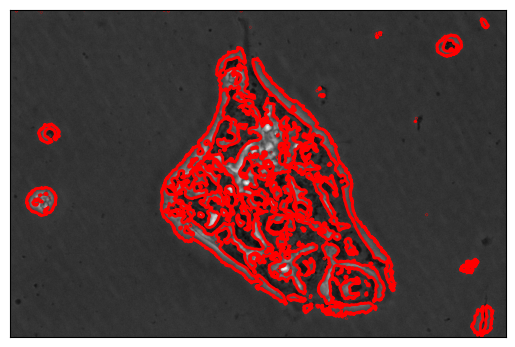

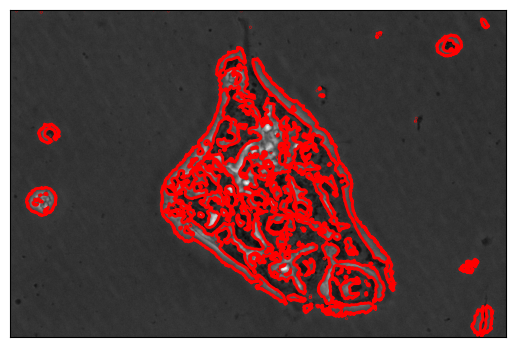

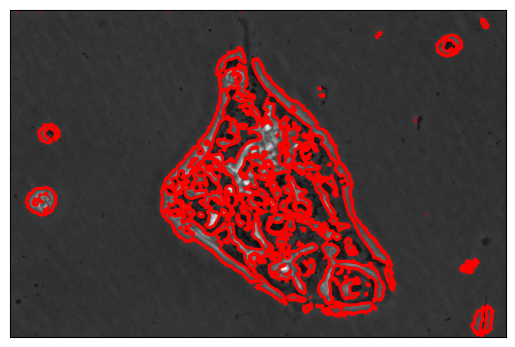

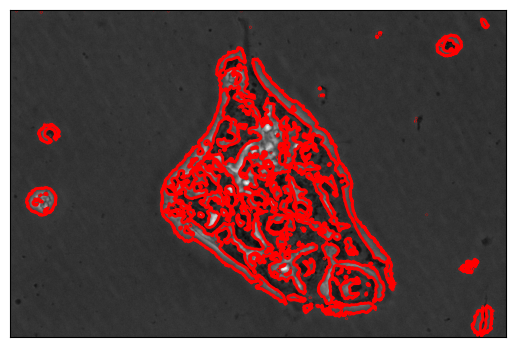

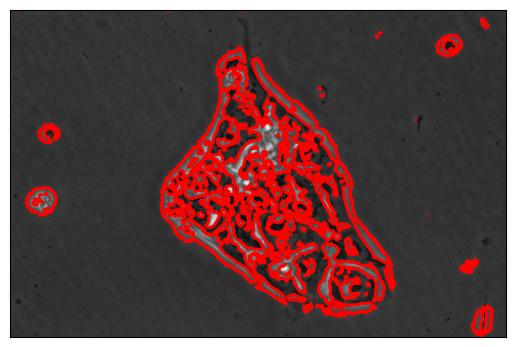

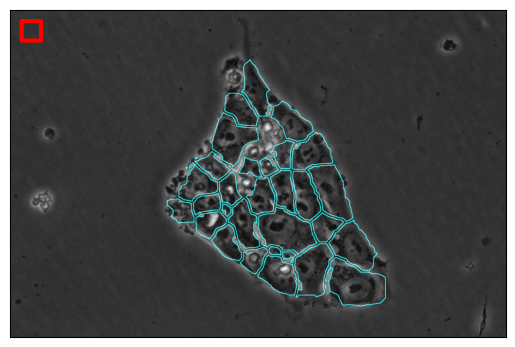

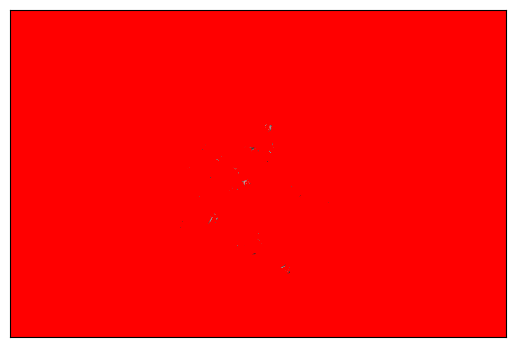

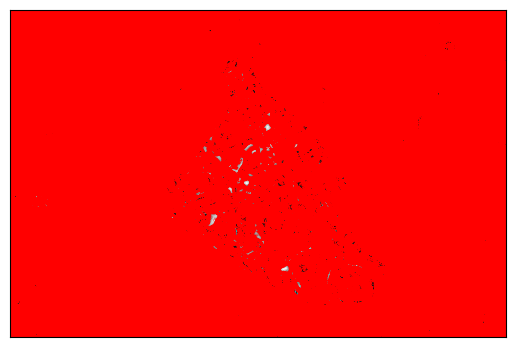

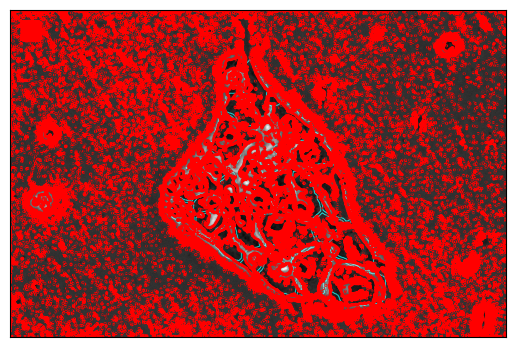

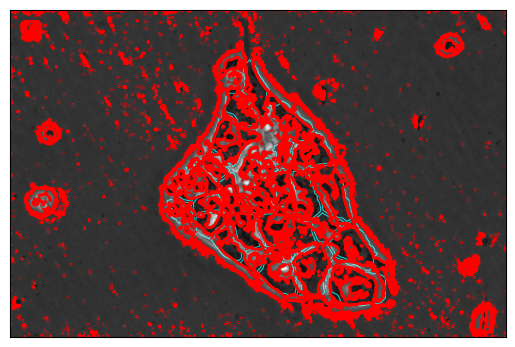

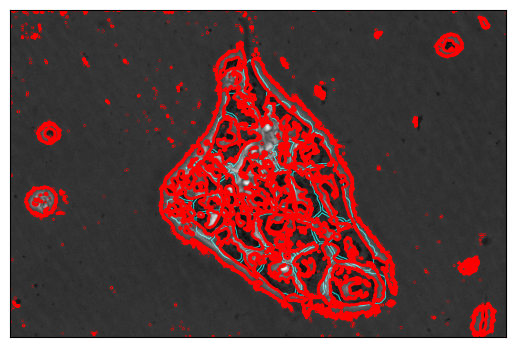

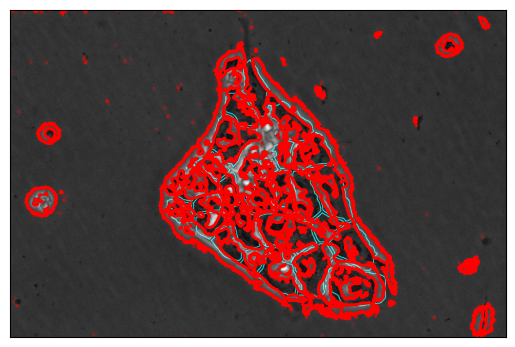

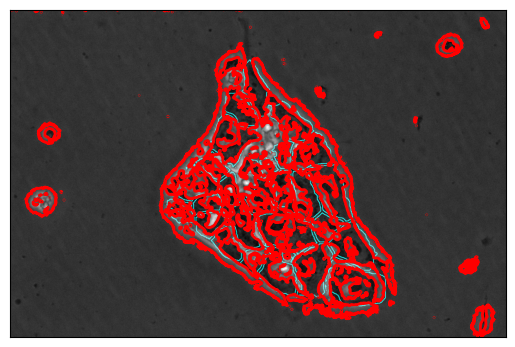

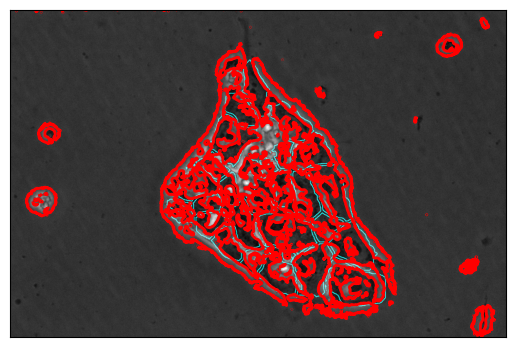

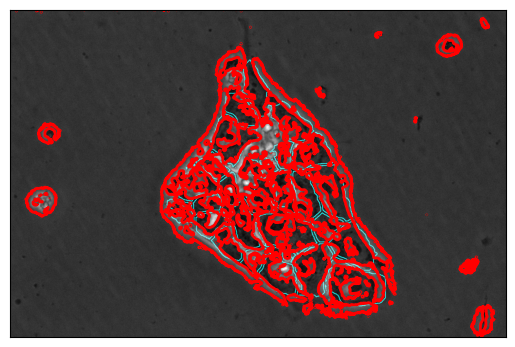

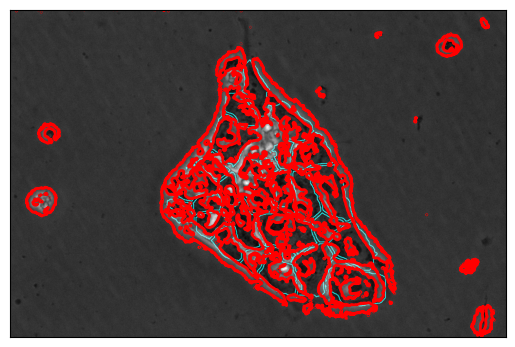

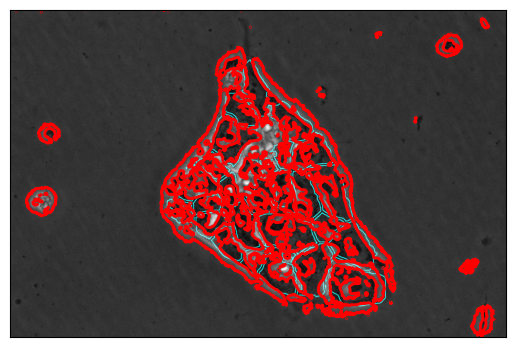

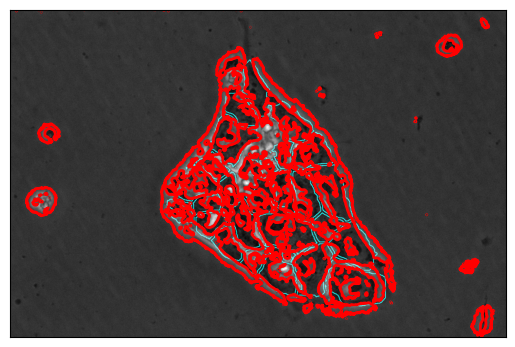

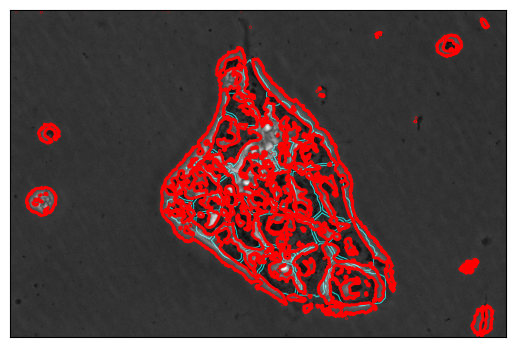

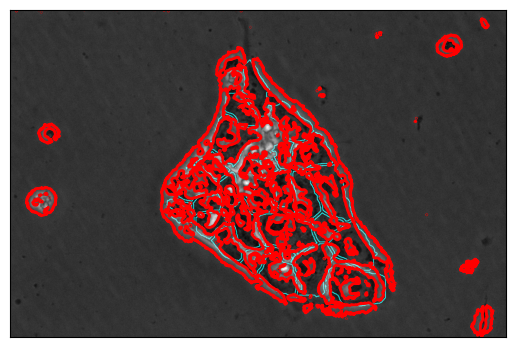

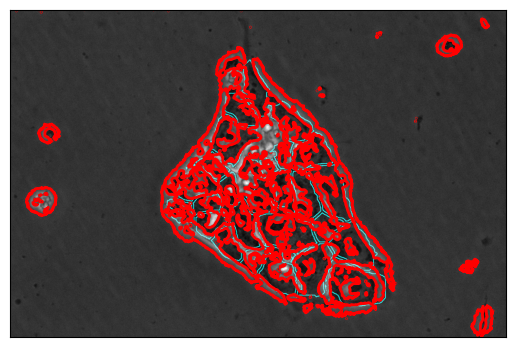

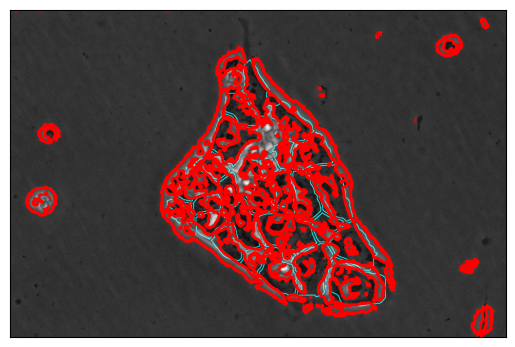

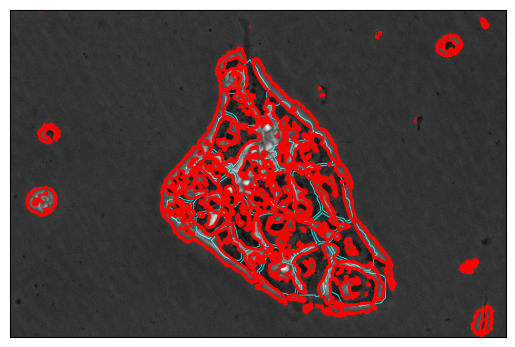

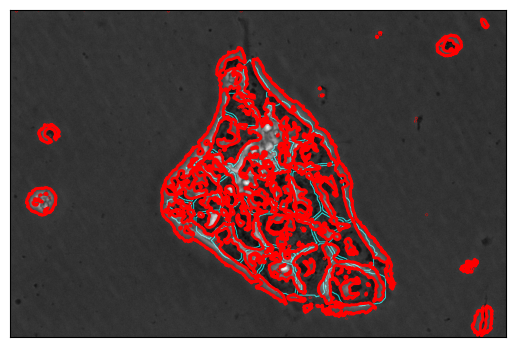

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.font_manager as fm

#coding:utf-8
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
from pylab import*

# Load and preprocess the image
Image = cv2.imread('genimage.tif', 1)  # Read input image
image = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)
img = np.array(image, dtype=np.float64)  # Convert to float64

# Initialize Level Set Function (LSF)
IniLSF = np.ones((img.shape[0], img.shape[1]), img.dtype)
IniLSF[30:80, 30:80] = -1
IniLSF = -IniLSF

# Draw initial contour
Image = cv2.cvtColor(Image, cv2.COLOR_BGR2RGB)
plt.figure(1), plt.imshow(Image), plt.xticks([]), plt.yticks([])
plt.contour(IniLSF, [0], colors='b', linewidths=2)
plt.draw(), plt.show(block=False)

# Function for mathematical operations
def mat_math(input_mat, operation):
    output = input_mat.copy()
    for i in range(input_mat.shape[0]):
        for j in range(input_mat.shape[1]):
            if operation == "atan":
                output[i, j] = math.atan(input_mat[i, j])
            elif operation == "sqrt":
                output[i, j] = math.sqrt(input_mat[i, j])
    return output

# Chan-Vese Function
def CV(LSF, img, mu, nu, epsilon, step):
    Drc = (epsilon / math.pi) / (epsilon * epsilon + LSF * LSF)
    Hea = 0.5 * (1 + (2 / math.pi) * mat_math(LSF / epsilon, "atan"))
    Iy, Ix = np.gradient(LSF)
    s = mat_math(Ix * Ix + Iy * Iy, "sqrt")
    Nx = Ix / (s + 1e-6)
    Ny = Iy / (s + 1e-6)
    Mxx, Nxx = np.gradient(Nx)
    Nyy, Myy = np.gradient(Ny)
    cur = Nxx + Nyy
    Length = nu * Drc * cur

    Lap = cv2.Laplacian(LSF, cv2.CV_64F)  # Fixing Laplacian data type issue
    Penalty = mu * (Lap - cur)

    s1 = Hea * img
    s2 = (1 - Hea) * img
    s3 = 1 - Hea
    C1 = s1.sum() / Hea.sum()
    C2 = s2.sum() / s3.sum()
    CVterm = Drc * (-1 * (img - C1) * (img - C1) + 1 * (img - C2) * (img - C2))

    LSF = LSF + step * (Length + Penalty + CVterm)
    return LSF



def main(image_path):

    Image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    img_gray = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY).astype(np.float64)
    LSF = np.ones_like(img_gray)
    LSF[30:80, 30:80] = -1
    LSF = -LSF
  # Apply Chan-Vese Model
    mu = 1
    nu = 0.003 * 255 * 255
    num = 20
    epsilon = 1
    step = 0.1
    LSF = IniLSF

    for i in range(1, num):
       LSF = CV(LSF, img, mu, nu, epsilon, step)  # Iterate Chan-Vese Model
       if i % 1 == 0:
         plt.imshow(Image), plt.xticks([]), plt.yticks([])
         plt.contour(LSF, [0], colors='r', linewidths=2)
         plt.draw(), plt.show(block=False), plt.pause(0.01)










if __name__ == "__main__":
    main("genimage.tif")
    main("markerimage.tif")
